## Диагностика недо и переобучения

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_openml
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, ElasticNet, LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from yellowbrick.model_selection import LearningCurve
from numpy import genfromtxt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [ ]:
X, y = make_classification(n_samples = 10000,
                           n_features = 500,
                           n_informative = 50,
                           n_repeated = 0,
                           class_sep = 1,
                           random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

print('- Logistic regression -')
# метрика эффективности классификации
print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

- Logistic regression -
Training score: 0.8415
Test score: 0.8056


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


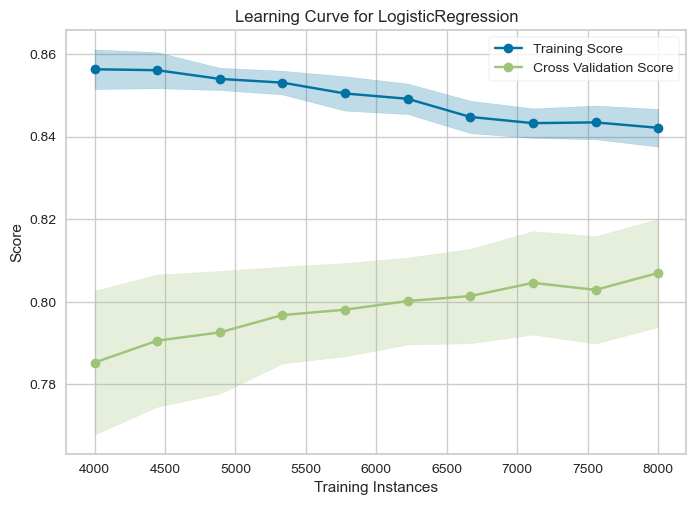

In [ ]:
# Кривые обучения
# Уровень сложности модели по отношению к данным
visualizer = LearningCurve(
    LogisticRegression(), # модель для проверки
    train_sizes = np.linspace(0.5, 1.0, 10) # набор долей выборки
).fit(X, y).show()

- RidgeClassifier -
Linear Regression-Training set score:: 0.7724
Linear Regression-Test set score: 0.7712


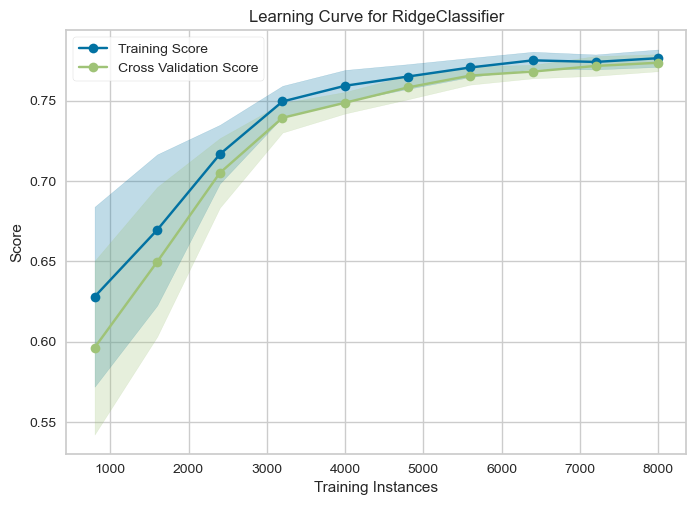

In [ ]:
rc = RidgeClassifier(alpha = 1000000).fit(X_train, y_train)

print('- RidgeClassifier -')
# Модель с большим значением параметра регуляризации:
print(f"Linear Regression-Training set score:: {rc.score(X_train, y_train):.4f}")
print(f"Linear Regression-Test set score: {rc.score(X_test, y_test):.4f}")
# эффективность ниже

visualizer = LearningCurve(
    RidgeClassifier(alpha = 1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() # недообучение

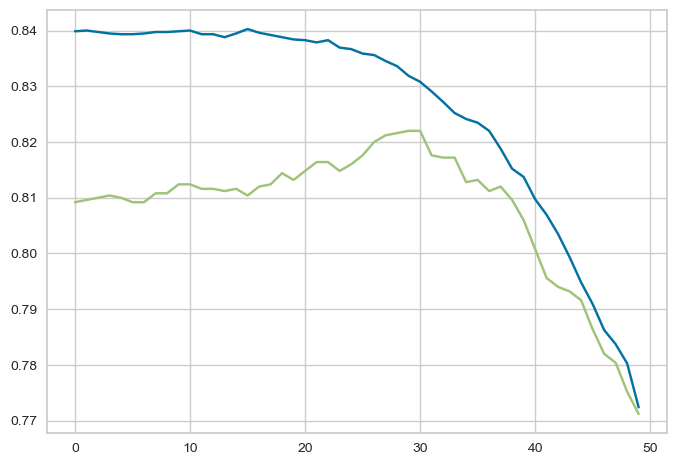

In [ ]:
# Логравномерное распределение
trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

# Данный код построит 50 моделей,
# различающихся только параметром регуляризации. Он будет лежать в диапазоне от 100 () до 100 000
plt.plot(trains)
plt.plot(tests)

## Задачи для самостоятельного решения

<b>1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1

In [ ]:
print('- Logistic regression -')
# метрика эффективности классификации
print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")
y_pred_lr = lr.predict(X_test)
print(f'Precision: {precision_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'F1: {f1_score(y_test, y_pred_lr)}')


print('\n- RidgeClassifier -')
# Модель с большим значением параметра регуляризации:
print(f"Linear Regression-Training trainig score: {rc.score(X_train, y_train):.4f}")
print(f"Linear Regression-Test test score: {rc.score(X_test, y_test):.4f}")
# эффективность ниже
y_pred_rc = rc.predict(X_test)
print(f'Precision: {precision_score(y_test, y_pred_rc)}')
print(f'Recall: {recall_score(y_test, y_pred_rc)}')
print(f'F1: {f1_score(y_test, y_pred_rc)}')

- Logistic regression -
Training score: 0.8415
Test score: 0.8056
Precision: 0.8068635275339185
Recall: 0.8055776892430279
F1: 0.80622009569378

- RidgeClassifier -
Linear Regression-Training trainig score: 0.7724
Linear Regression-Test test score: 0.7712
Precision: 0.7678431372549019
Recall: 0.7800796812749003
F1: 0.7739130434782607


Значения precision, recall и F1 для модели LogisticRegression выше, чем у модели RidgeClassifier.


Модель логистической регрессии имеет лучший баланс между точностью и полнотой прогнозов.

<b>2. Повторите диагностику модели регрессии с использованием других видов моделей:
    
a) метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

b) метода ближайших соседей (исследуйте влияние количества соседей)

c) метода решающих деревьев (гиперпараметры по вашему выбору)
    

In [ ]:
trains_svr, tests_svr = list(), list()
for i in [0.1, 10, 100]:
    svr = SVR(C = i, kernel = 'rbf', gamma = 'scale').fit(X_train, y_train)
    trains_svr.append(svr.score(X_train, y_train))
    tests_svr.append(svr.score(X_test, y_test))

trains_kneigh, tests_kneigh = list(), list()
for i in [i + 1 for i in range(10)]:
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    trains_kneigh.append(neigh.score(X_train, y_train))
    tests_kneigh.append(neigh.score(X_test, y_test))

trains_tree, tests_tree = list(), list()
for i in [i + 1 for i in range(6)]:
    tree = DecisionTreeRegressor(max_depth = i).fit(X_train, y_train)
    trains_tree.append(tree.score(X_train, y_train))
    tests_tree.append(tree.score(X_test, y_test))


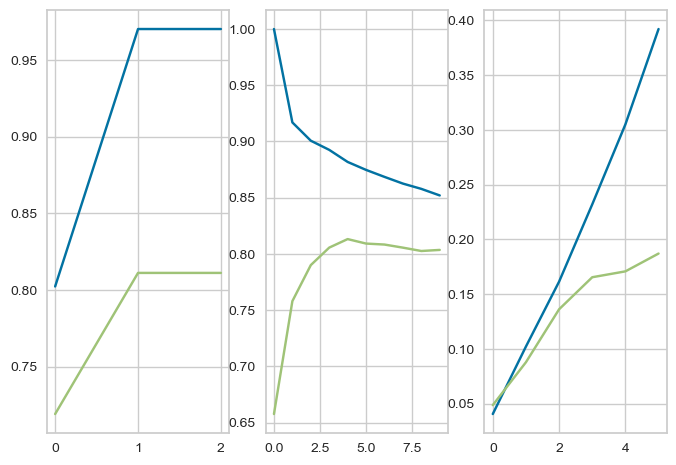

In [ ]:
ax0 = plt.subplot(131)
plt.plot(trains_svr)
plt.plot(tests_svr)
ax1 = plt.subplot(132)
plt.plot(trains_kneigh)
plt.plot(tests_kneigh)
ax2 = plt.subplot(133)
plt.plot(trains_tree)
plt.plot(tests_tree)

<b>3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [ ]:
boston = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')

In [ ]:
X, y = boston[:,:-1], boston[:, -1]

In [ ]:
display(X)
display(y)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+02, tolerance: 1.875e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+00, tolerance: 1.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.298e+00, tolerance: 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+02, tolerance: 1.550e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(


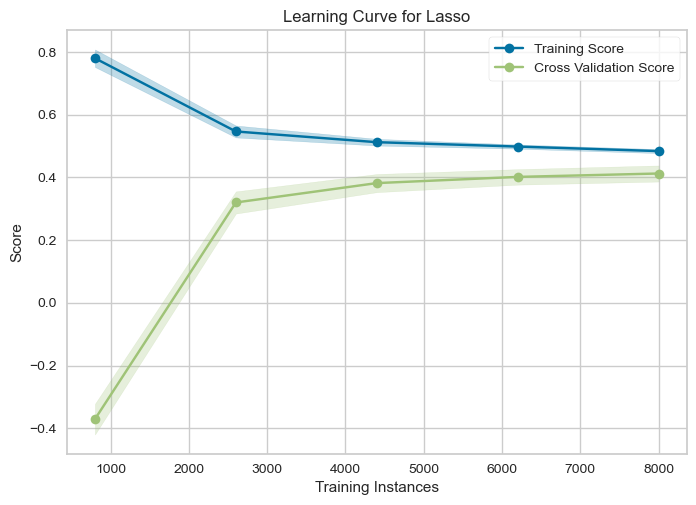

- Lasso where alpha = 0.0001 -
Training score: 0.4836
Test score: 0.4177


In [ ]:
lasso0001 = Lasso(alpha = 0.001)
lasso0001.fit(X_train, y_train)

visualizer0001 = LearningCurve(
    lasso0001).fit(X, y).show()


print('- Lasso where alpha = 0.001 -')
print(f"Training score: {lasso0001.score(X_train, y_train):.4f}")
print(f"Test score: {lasso0001.score(X_test, y_test):.4f}")

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+00, tolerance: 1.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.298e+00, tolerance: 6.498e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.766e+01, tolerance: 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(


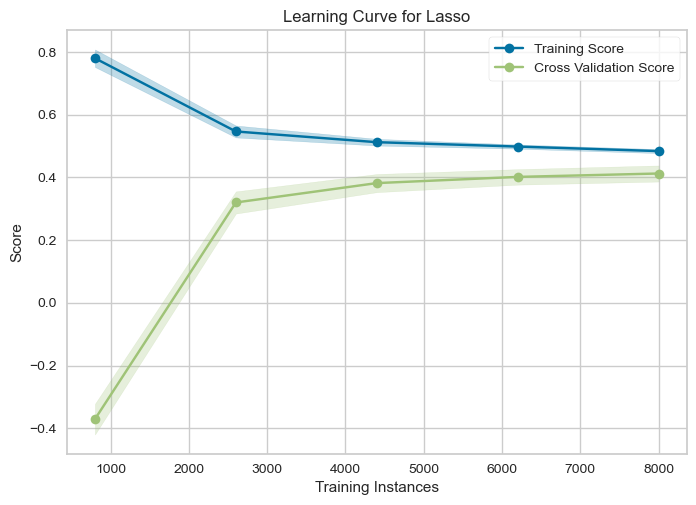

- Lasso where alpha = 0.1 -
Training score: 0.3805
Test score: 0.3795


In [ ]:
lasso1 = Lasso(alpha = 0.1)
lasso1.fit(X_train, y_train)

visualizer0001 = LearningCurve(
    lasso0001).fit(X, y).show()

print('- Lasso where alpha = 0.1 -')
print(f"Training score: {lasso1.score(X_train, y_train):.4f}")
print(f"Test score: {lasso1.score(X_test, y_test):.4f}")

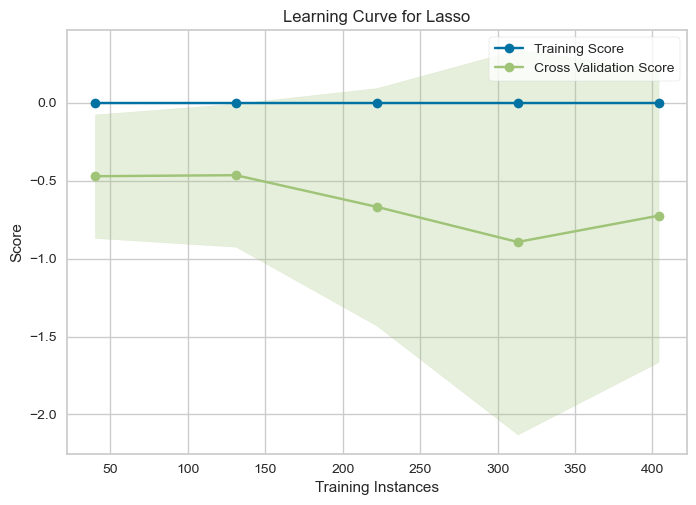

- Lasso where alpha = 10 -
Training score: 0.0000
Test score: -0.0000


In [ ]:
lasso10 = Lasso(alpha = 10)
lasso10.fit(X_train, y_train)

visualizer10 = LearningCurve(
    lasso10).fit(X, y).show()

print('- Lasso where alpha = 10 -')
print(f"Training score: {lasso10.score(X_train, y_train):.4f}")
print(f"Test score: {lasso10.score(X_test, y_test):.4f}")

<b>4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [ ]:
trains_elastic, tests_elastic = list(), list()
for i in [i+0.1 for i in range(1)]:
  elastic_net = ElasticNet(alpha = i, l1_ratio = i).fit(X_train, y_train)

  trains_elastic.append(elastic_net.score(X_train, y_train))
  tests_elastic.append(elastic_net.score(X_test, y_test))

print("ElasticNet")
print(f"Training score: {elastic_net.score(X_train, y_train):.4f}")
print(f"Test score: {elastic_net.score(X_test, y_test):.4f}")


ElasticNet
Training score: 0.6657
Test score: 0.6458


<b>5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете.

In [ ]:
tree = DecisionTreeRegressor()
train_scores, test_scores = list(), list()

for depth in range(1, 11):
    tree.set_params(max_depth = depth)
    tree.fit(X_train, y_train)

    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

best_depth = np.argmax(test_scores) + 1

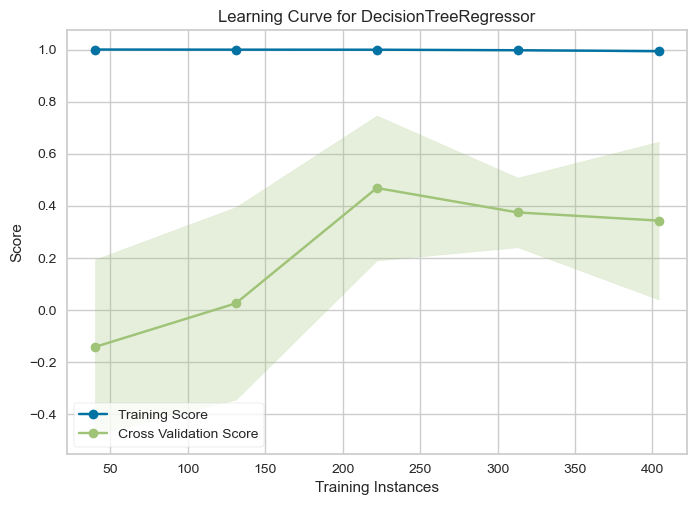

In [ ]:
visualizer = LearningCurve(
    tree).fit(X, y).show()

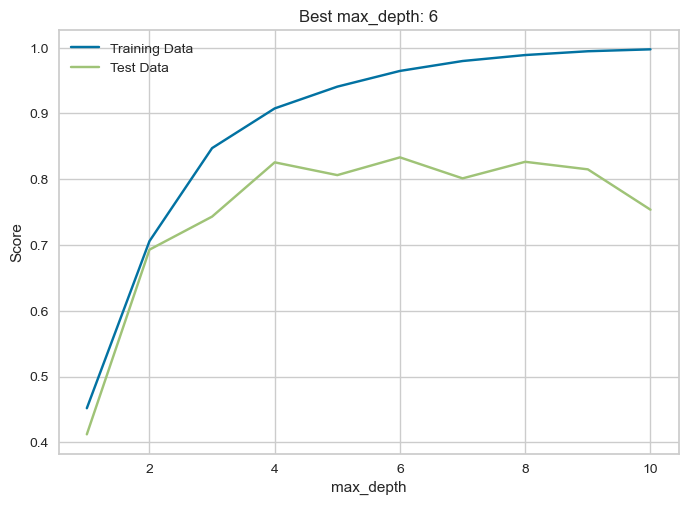

In [ ]:
plt.plot(range(1, 11), train_scores)
plt.plot(range(1, 11), test_scores)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Training Data', 'Test Data'])
plt.title(f'Best max_depth: {best_depth}')
plt.show()

<b>6. Повторите анализ на других реальных датасетах из репозитория OpenML:
    

<strong>PHONEME

In [ ]:
phoneme = fetch_openml(name='phoneme')
X = pd.get_dummies(phoneme.data)
y = phoneme.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1.
  warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

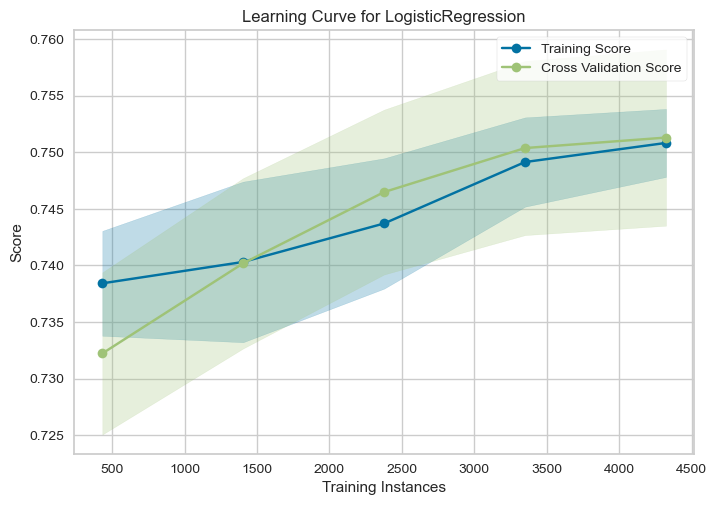

Training score: 0.7543
Test score: 0.7401
Малый разрыв между обучающей и тестовой эффективностью -> недообучение


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression()).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Малый разрыв между обучающей и тестовой эффективностью -> недообучение')

<b>Используем многослойный перцептрон

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

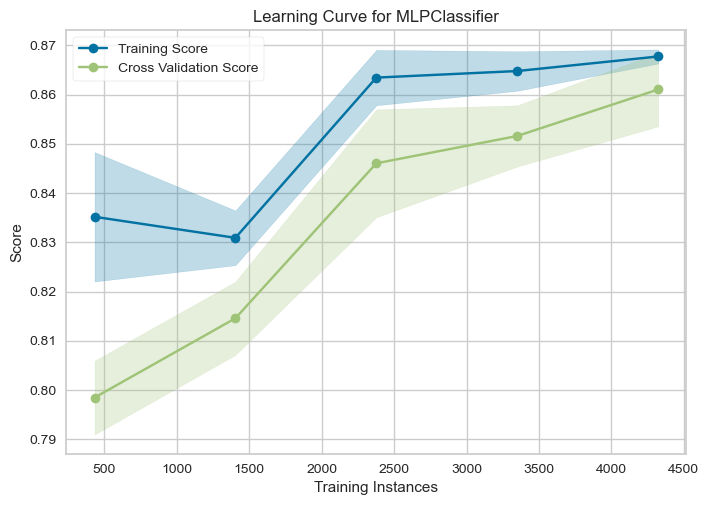

Training score: 0.8668
Test score: 0.8538
Улучшение модели на лицо. Разница увеличилась!


In [ ]:
model = MLPClassifier().fit(X_train, y_train)


visualizer = LearningCurve(
    MLPClassifier()).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")
print('Улучшение модели на лицо. Разница увеличилась!')

<b>BANKNOTE-AUTHENTICATION

In [ ]:
bank = fetch_openml(name='banknote-authentication')
X = pd.get_dummies(bank.data)
y = bank.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

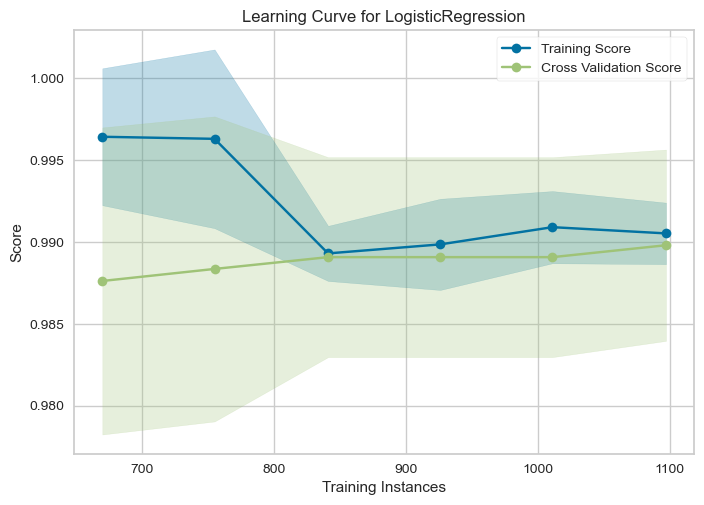

Training score: 0.9900
Test score: 0.9927
Хорошая модель)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Хорошая модель)')

<b>DELTA_AILERONS

In [ ]:
delta_ailerons = fetch_openml(name='delta_ailerons')

X = pd.get_dummies(delta_ailerons.data)
y = delta_ailerons.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

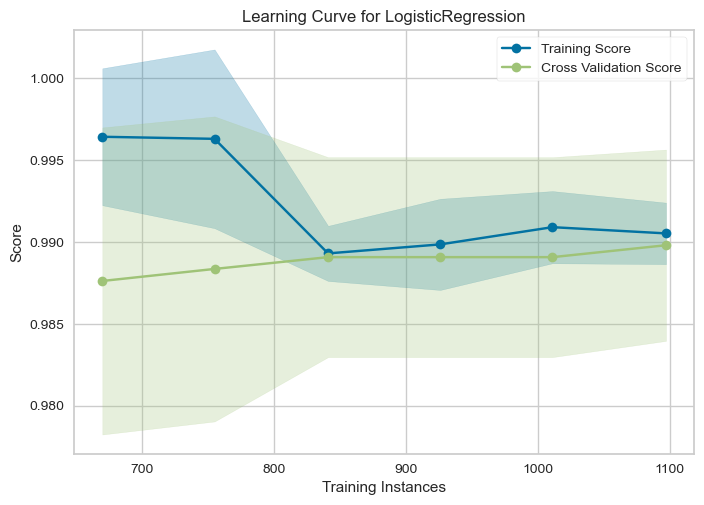

Training score: 0.9900
Test score: 0.9927
Недообученная модель с низкой эффективностью(


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Недообученная модель с низкой эффективностью(')

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

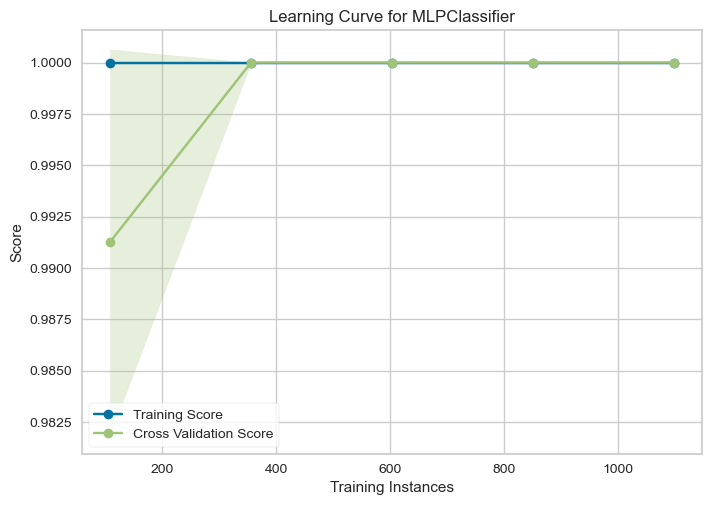

Training score: 1.0000
Test score: 1.0000
Эффективность повысилась!


In [ ]:
model = MLPClassifier().fit(X_train, y_train)


visualizer = LearningCurve(
    MLPClassifier()).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")
print('Эффективность повысилась!')

<b>MAMMOGRAPHY

In [ ]:
mammography = fetch_openml(name='mammography')
X = pd.get_dummies(mammography.data)
y = mammography.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

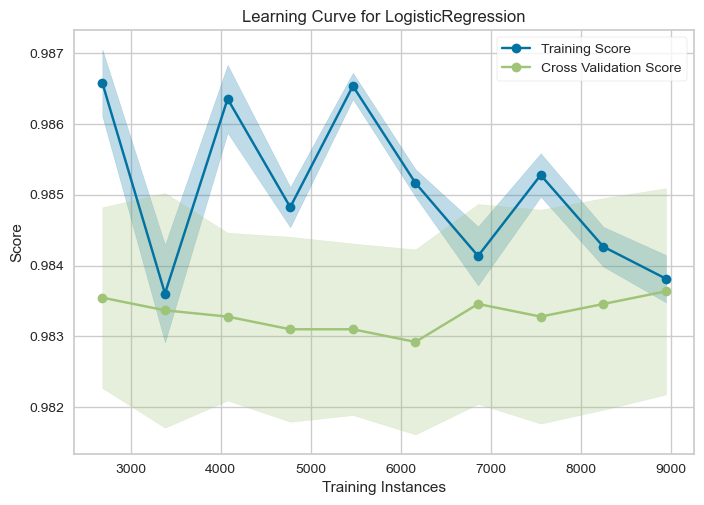

Training score: 0.9839
Test score: 0.9826
Недообучение и переобучение в одном флаконе


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Недообучение и переобучение')

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

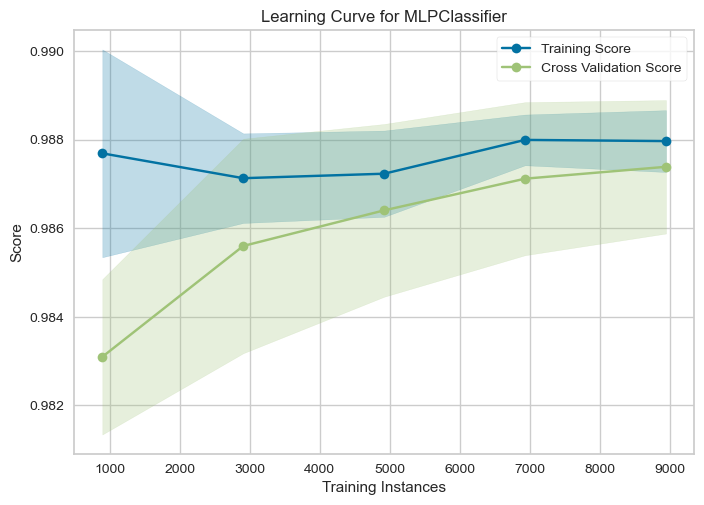

Training score: 0.9876
Test score: 0.9848
Эффективность повысилась!


In [ ]:
model = MLPClassifier().fit(X_train, y_train)

visualizer = LearningCurve(
    MLPClassifier()).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")
print('Эффективность повысилась!')

<b>ELECTRICITY

In [ ]:
electricity = fetch_openml(name='electricity')
X = pd.get_dummies(electricity.data)
y = electricity.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1.
  warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


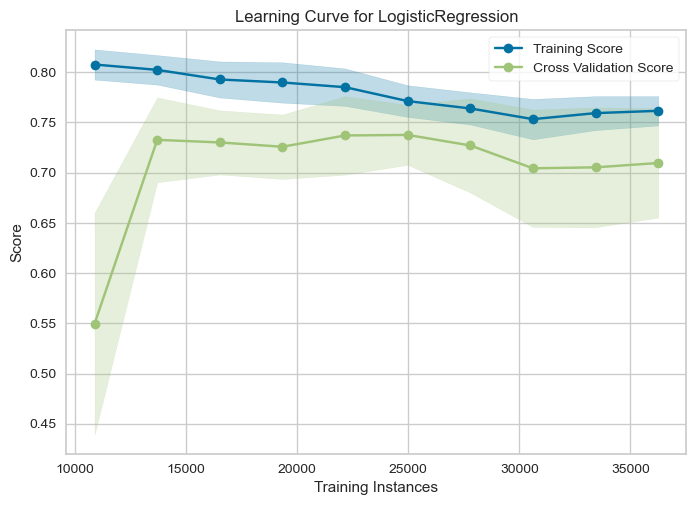

Training score: 0.7524
Test score: 0.7587
Хорошая модель)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Хорошая модель)')

<b>KROPT

In [ ]:
kropt = fetch_openml(name='kropt')
X = pd.get_dummies(kropt.data)
y = kropt.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

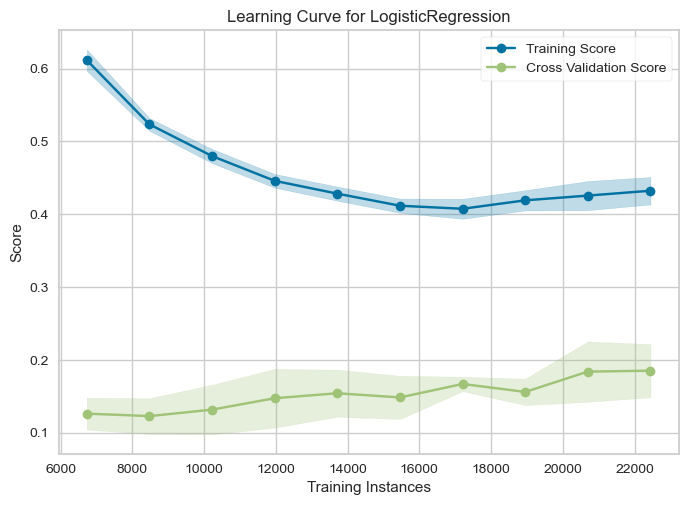

Training score: 0.4113
Test score: 0.4018
Переобученная модель ( большая разница между эффективностями)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Переобученная модель ( большая разница между эффективностями)')

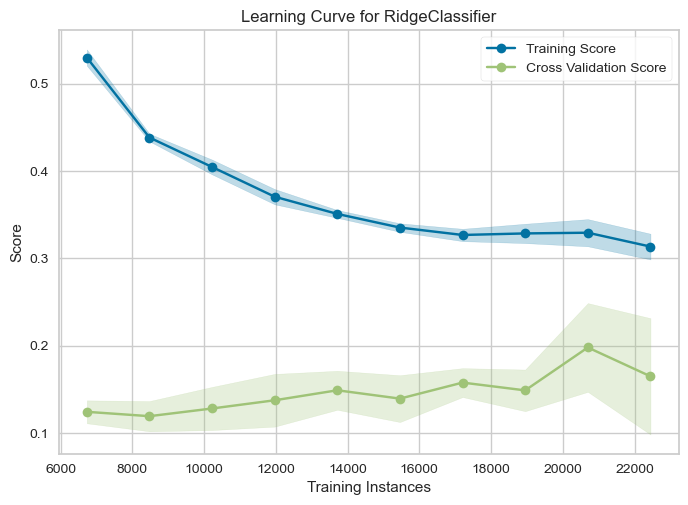

Training score: 0.2934
Test score: 0.2881


In [ ]:
model = RidgeClassifier(alpha = 1).fit(X_train, y_train)

visualizer = LearningCurve(
    RidgeClassifier(alpha = 1), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

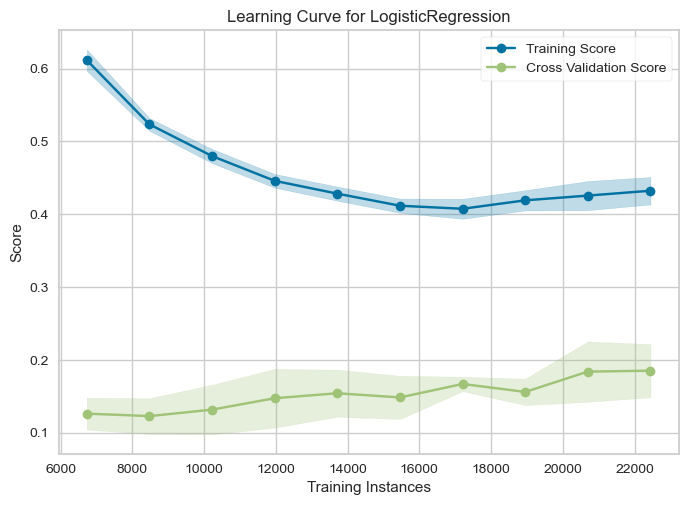

Training score: 0.4113
Test score: 0.4018
Хорошая модель)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Хорошая модель)')

При переобучении модели регуляризация помогает уменьшить веса признаков (features), которые не вносят вклад в предсказание целевой переменной, тем самым снижая влияние этих признаков и улучшая обобщающую способность модели.

<b>NURSERY

In [ ]:
nursery = fetch_openml(name='nursery')
X = pd.get_dummies(nursery.data)
y = nursery.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name nursery exist. Versions may be fundamentally different, returning version 1.
  warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

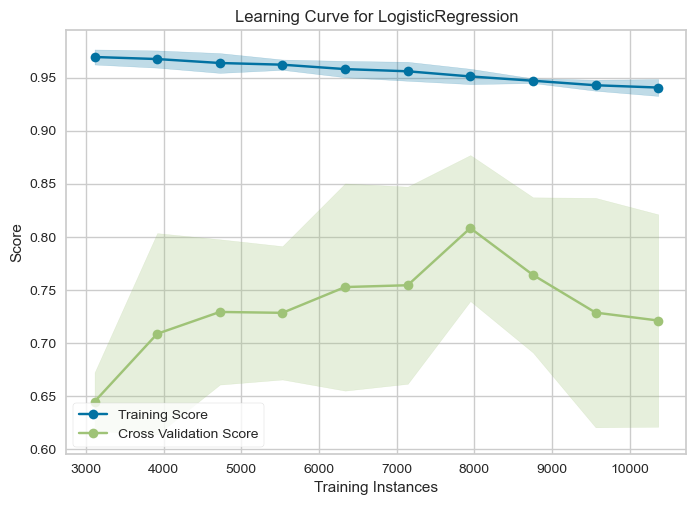

Training score: 0.9253
Test score: 0.9329
Переобученная модель ( большая разница между эффективностями)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

print('Переобученная модель ( большая разница между эффективностями)')

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


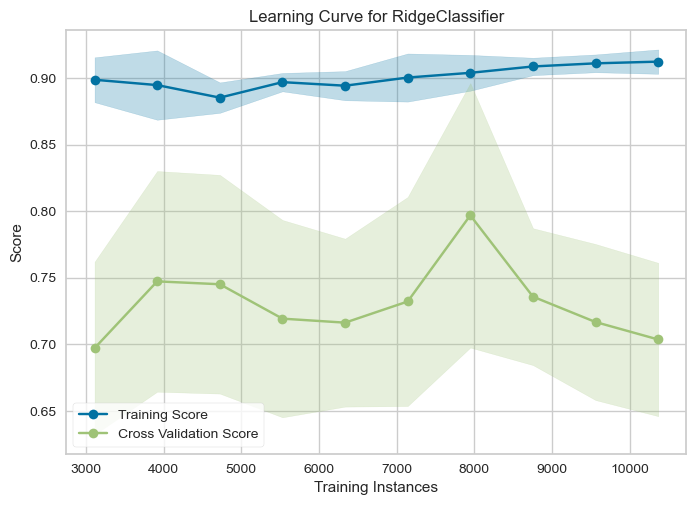

Training score: 0.9077
Test score: 0.9182


In [ ]:
model = RidgeClassifier(alpha = 2).fit(X_train, y_train)

visualizer = LearningCurve(
    RidgeClassifier(alpha = 2), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

In [ ]:
train_scores, test_scores = list(), list()

for alp in range(1, 100):
    model.set_params(alpha = alp)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

best = np.argmax(test_scores) + 1

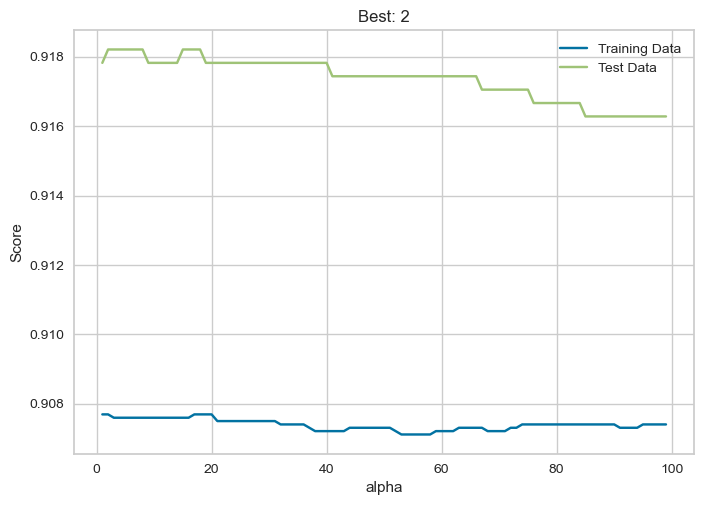

In [ ]:
plt.plot(range(1, 100), train_scores)
plt.plot(range(1, 100), test_scores)
plt.xlabel('alpha')
plt.ylabel('Score')
plt.legend(['Training Data', 'Test Data'])
plt.title(f'Best: {best}')
plt.show()

<b>VOLCANOESb3

In [ ]:
volcanoesb3 = fetch_openml(name='volcanoes-b3')
X = pd.get_dummies(volcanoesb3.data)
y = volcanoesb3.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

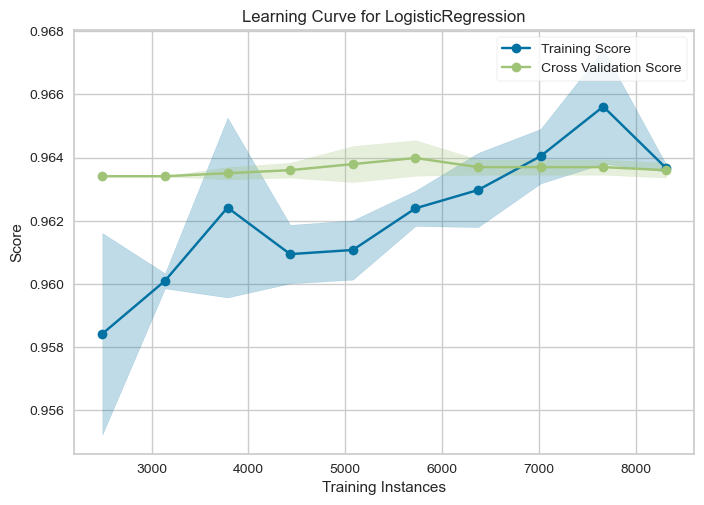

Training score: 0.9620
Test score: 0.9702


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X, y) .show()

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

    Недообучение - Алгоритм показывает низкое качество
    - ( низкие значения эффективности и практически никакой разницы между тестовой и обучающей эффективностью )

    Переобучени - Качество на обучающей выборке намного выше, чем на тестовой
